# Imports

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import Binarizer

# Use Dataset

In [3]:
df = pd.read_csv('dataset/mobile_addiction_data.csv')

df.head()

,User_ID,Country,Age,Gender,Occupation,Education_Level,Income_USD,Daily_Screen_Time_Hours,Phone_Unlocks_Per_Day,Social_Media_Usage_Hours,...,Online_Shopping_Hours,Internet_Connection_Type,Primary_Device_Brand,Has_Screen_Time_Management_App,Self_Reported_Addiction_Level,Monthly_Data_Usage_GB,Has_Night_Mode_On,Age_First_Phone,Push_Notifications_Per_Day,Tech_Savviness_Score
0,1,India,32,Male,Salesperson,High School,43865.49,5.81,75,0.84,...,1.85,5G,Other,No,Low,16.43,Yes,16,106,39.36
1,2,UK,26,Male,Artist,Master's,41868.19,9.05,61,3.13,...,0.66,4G,Samsung,Yes,Severe,32.87,No,12,111,9.45
2,3,Germany,70,Other,Doctor,High School,59636.51,5.76,58,2.12,...,-0.14,WiFi,Samsung,Yes,Severe,27.45,No,18,90,50.27
3,4,UK,44,Female,Engineer,NaN,39022.07,6.71,80,1.60,...,0.17,3G,Apple,Yes,Moderate,30.85,No,17,60,30.82
4,5,Brazil,46,Other,Student,NaN,-783.98,6.31,136,1.51,...,0.58,3G,Xiaomi,No,High,10.38,Yes,18,127,21.70


In [4]:

# Forma e datasetit
print("Number of rows::",df.shape[0])
print("Number of columns::",df.shape[1])
print("==================================================================")

# Llojet e atributeve
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Atributet kategorike", categorical_columns)
print("Atributet numerike", numerical_columns)

Number of rows:: 3000
Number of columns:: 34
Atributet kategorike Index(['Country', 'Gender', 'Occupation', 'Education_Level',
       'Relationship_Status', 'Has_Children', 'Urban_or_Rural',
       'Internet_Connection_Type', 'Primary_Device_Brand',
       'Has_Screen_Time_Management_App', 'Self_Reported_Addiction_Level',
       'Has_Night_Mode_On'],
      dtype='object')
Atributet numerike Index(['User_ID', 'Age', 'Income_USD', 'Daily_Screen_Time_Hours',
       'Phone_Unlocks_Per_Day', 'Social_Media_Usage_Hours',
       'Gaming_Usage_Hours', 'Streaming_Usage_Hours', 'Messaging_Usage_Hours',
       'Work_Related_Usage_Hours', 'Sleep_Hours', 'Physical_Activity_Hours',
       'Mental_Health_Score', 'Depression_Score', 'Anxiety_Score',
       'Stress_Level', 'Time_Spent_With_Family_Hours', 'Online_Shopping_Hours',
       'Monthly_Data_Usage_GB', 'Age_First_Phone',
       'Push_Notifications_Per_Day', 'Tech_Savviness_Score'],
      dtype='object')


In [5]:
#columns name formatting

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [6]:
print("General Statistics::\n")
print(df.info())

print("Summary Statistics::\n")
print(df.describe(include='all'))

General Statistics::

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         3000 non-null   int64  
 1   country                         3000 non-null   object 
 2   age                             3000 non-null   int64  
 3   gender                          3000 non-null   object 
 4   occupation                      3000 non-null   object 
 5   education_level                 2388 non-null   object 
 6   income_usd                      3000 non-null   float64
 7   daily_screen_time_hours         3000 non-null   float64
 8   phone_unlocks_per_day           3000 non-null   int64  
 9   social_media_usage_hours        3000 non-null   float64
 10  gaming_usage_hours              3000 non-null   float64
 11  streaming_usage_hours           3000 non-null   float64
 12  messaging_us

In [7]:
# drop unnecessary columns
df = df.drop(columns=[
    'user_id',
    'primary_device_brand',
    'internet_connection_type',
    
], errors='ignore')

df.head()

,country,age,gender,occupation,education_level,income_usd,daily_screen_time_hours,phone_unlocks_per_day,social_media_usage_hours,gaming_usage_hours,...,urban_or_rural,time_spent_with_family_hours,online_shopping_hours,has_screen_time_management_app,self_reported_addiction_level,monthly_data_usage_gb,has_night_mode_on,age_first_phone,push_notifications_per_day,tech_savviness_score
0,India,32,Male,Salesperson,High School,43865.49,5.81,75,0.84,-1.55,...,Rural,1.70,1.85,No,Low,16.43,Yes,16,106,39.36
1,UK,26,Male,Artist,Master's,41868.19,9.05,61,3.13,2.50,...,Rural,0.90,0.66,Yes,Severe,32.87,No,12,111,9.45
2,Germany,70,Other,Doctor,High School,59636.51,5.76,58,2.12,1.96,...,Urban,1.69,-0.14,Yes,Severe,27.45,No,18,90,50.27
3,UK,44,Female,Engineer,NaN,39022.07,6.71,80,1.60,2.70,...,Urban,1.11,0.17,Yes,Moderate,30.85,No,17,60,30.82
4,Brazil,46,Other,Student,NaN,-783.98,6.31,136,1.51,1.73,...,Urban,1.06,0.58,No,High,10.38,Yes,18,127,21.70


In [8]:

# Vlerat e zbrazëta
print("Columns with Missing Values::", df.columns[df.isnull().any()].tolist())
print("Number of rows with Missing Values::", df.isnull().any(axis=1).sum())
print("Sample Indices with missing data::", df.isnull().any(axis=1).to_numpy().nonzero()[0].tolist()[0:10])

Columns with Missing Values:: ['education_level']
Number of rows with Missing Values:: 612
Sample Indices with missing data:: [3, 4, 8, 16, 18, 40, 44, 45, 55, 66]


In [9]:
numeric_df = df.select_dtypes(include=[np.number])

negatives_mask = numeric_df < 0

negatives_count = negatives_mask.sum()

print("=== Negative Number Summary ===")
for col, count in negatives_count.items():
    if count > 0:
        print(f"{col}: {count} negative values")
    else:
        print(f"{col}: No negative values")

=== Negative Number Summary ===
age: No negative values
income_usd: 81 negative values
daily_screen_time_hours: 9 negative values
phone_unlocks_per_day: 1 negative values
social_media_usage_hours: 70 negative values
gaming_usage_hours: 213 negative values
streaming_usage_hours: 67 negative values
messaging_usage_hours: 2 negative values
work_related_usage_hours: 53 negative values
sleep_hours: No negative values
physical_activity_hours: 80 negative values
mental_health_score: No negative values
depression_score: No negative values
anxiety_score: No negative values
stress_level: No negative values
time_spent_with_family_hours: 96 negative values
online_shopping_hours: 181 negative values
monthly_data_usage_gb: 16 negative values
age_first_phone: No negative values
push_notifications_per_day: 3 negative values
tech_savviness_score: No negative values


In [10]:
# show rows that contain any negative numeric values
rows_with_negatives = df[negatives_mask.any(axis=1)]

rows_with_negatives.head()

,country,age,gender,occupation,education_level,income_usd,daily_screen_time_hours,phone_unlocks_per_day,social_media_usage_hours,gaming_usage_hours,...,urban_or_rural,time_spent_with_family_hours,online_shopping_hours,has_screen_time_management_app,self_reported_addiction_level,monthly_data_usage_gb,has_night_mode_on,age_first_phone,push_notifications_per_day,tech_savviness_score
0,India,32,Male,Salesperson,High School,43865.49,5.81,75,0.84,-1.55,...,Rural,1.70,1.85,No,Low,16.43,Yes,16,106,39.36
2,Germany,70,Other,Doctor,High School,59636.51,5.76,58,2.12,1.96,...,Urban,1.69,-0.14,Yes,Severe,27.45,No,18,90,50.27
4,Brazil,46,Other,Student,NaN,-783.98,6.31,136,1.51,1.73,...,Urban,1.06,0.58,No,High,10.38,Yes,18,127,21.70
12,USA,18,Female,Engineer,Bachelor's,16430.69,5.01,75,1.12,0.69,...,Urban,2.16,-0.23,Yes,Severe,29.76,Yes,8,112,37.84
17,Mexico,18,Male,Doctor,PhD,40513.10,6.06,68,1.38,-0.52,...,Urban,2.33,0.90,No,Severe,31.20,No,13,12,47.86


In [11]:
# replace all negative hours to 0
time_columns = [
    "daily_screen_time_hours",
    "phone_unlocks_per_day",
    "social_media_usage_hours",
    "gaming_usage_hours",
    "streaming_usage_hours",
    "messaging_usage_hours",
    "work_related_usage_hours",
    "sleep_hours",
    "physical_activity_hours",
    "time_spent_with_family_hours",
    "online_shopping_hours",
    "monthly_data_usage_gb",
    "push_notifications_per_day"
]

df[time_columns] = df[time_columns].clip(lower=0)

rows_with_negatives = df[negatives_mask.any(axis=1)]

rows_with_negatives.head()

,country,age,gender,occupation,education_level,income_usd,daily_screen_time_hours,phone_unlocks_per_day,social_media_usage_hours,gaming_usage_hours,...,urban_or_rural,time_spent_with_family_hours,online_shopping_hours,has_screen_time_management_app,self_reported_addiction_level,monthly_data_usage_gb,has_night_mode_on,age_first_phone,push_notifications_per_day,tech_savviness_score
0,India,32,Male,Salesperson,High School,43865.49,5.81,75,0.84,0.00,...,Rural,1.70,1.85,No,Low,16.43,Yes,16,106,39.36
2,Germany,70,Other,Doctor,High School,59636.51,5.76,58,2.12,1.96,...,Urban,1.69,0.00,Yes,Severe,27.45,No,18,90,50.27
4,Brazil,46,Other,Student,NaN,-783.98,6.31,136,1.51,1.73,...,Urban,1.06,0.58,No,High,10.38,Yes,18,127,21.70
12,USA,18,Female,Engineer,Bachelor's,16430.69,5.01,75,1.12,0.69,...,Urban,2.16,0.00,Yes,Severe,29.76,Yes,8,112,37.84
17,Mexico,18,Male,Doctor,PhD,40513.10,6.06,68,1.38,0.00,...,Urban,2.33,0.90,No,Severe,31.20,No,13,12,47.86


In [12]:
# Select all rows that contains NaN value
nan_rows = df[df.isna().any(axis=1)]
print(df.isna().sum()[df.isna().sum() > 0])

print("=== Rows containing NaN values ===")
nan_rows.head()

education_level    612
dtype: int64
=== Rows containing NaN values ===


,country,age,gender,occupation,education_level,income_usd,daily_screen_time_hours,phone_unlocks_per_day,social_media_usage_hours,gaming_usage_hours,...,urban_or_rural,time_spent_with_family_hours,online_shopping_hours,has_screen_time_management_app,self_reported_addiction_level,monthly_data_usage_gb,has_night_mode_on,age_first_phone,push_notifications_per_day,tech_savviness_score
3,UK,44,Female,Engineer,NaN,39022.07,6.71,80,1.60,2.70,...,Urban,1.11,0.17,Yes,Moderate,30.85,No,17,60,30.82
4,Brazil,46,Other,Student,NaN,-783.98,6.31,136,1.51,1.73,...,Urban,1.06,0.58,No,High,10.38,Yes,18,127,21.70
8,Nigeria,33,Other,Salesperson,NaN,26629.11,7.45,50,2.02,0.49,...,Urban,0.77,0.10,Yes,High,24.49,No,8,85,31.52
16,USA,51,Other,Manager,NaN,41764.15,8.19,47,1.29,1.72,...,Rural,1.64,0.37,No,Moderate,23.55,Yes,12,149,10.65
18,USA,33,Male,Manager,NaN,6521.03,5.79,47,0.00,0.34,...,Rural,0.00,0.77,No,Severe,41.45,Yes,11,99,14.92


In [13]:
# Check for duplicate rows 
duplicate_rows = df[df.duplicated()]

print(f"Number of duplicate rows found: {duplicate_rows.shape[0]}")


if duplicate_rows.shape[0] > 0:
    df = df.drop_duplicates()
    print(" Duplicate rows removed successfully.")
else:
    print(" No duplicate rows found.")


print(f"New dataset shape: {df.shape}")

Number of duplicate rows found: 0
 No duplicate rows found.
New dataset shape: (3000, 31)


In [14]:
#Typecasting categorical columns

df = df.apply(lambda col: col.map({'Yes': 1, 'No': 0}) if col.dropna().isin(['Yes', 'No']).all() else col)

df['has_children'] = df['has_children'].astype(bool)

df.head()

,country,age,gender,occupation,education_level,income_usd,daily_screen_time_hours,phone_unlocks_per_day,social_media_usage_hours,gaming_usage_hours,...,urban_or_rural,time_spent_with_family_hours,online_shopping_hours,has_screen_time_management_app,self_reported_addiction_level,monthly_data_usage_gb,has_night_mode_on,age_first_phone,push_notifications_per_day,tech_savviness_score
0,India,32,Male,Salesperson,High School,43865.49,5.81,75,0.84,0.00,...,Rural,1.70,1.85,0,Low,16.43,1,16,106,39.36
1,UK,26,Male,Artist,Master's,41868.19,9.05,61,3.13,2.50,...,Rural,0.90,0.66,1,Severe,32.87,0,12,111,9.45
2,Germany,70,Other,Doctor,High School,59636.51,5.76,58,2.12,1.96,...,Urban,1.69,0.00,1,Severe,27.45,0,18,90,50.27
3,UK,44,Female,Engineer,NaN,39022.07,6.71,80,1.60,2.70,...,Urban,1.11,0.17,1,Moderate,30.85,0,17,60,30.82
4,Brazil,46,Other,Student,NaN,-783.98,6.31,136,1.51,1.73,...,Urban,1.06,0.58,0,High,10.38,1,18,127,21.70


In [15]:
# handling categorical columns with one-hot encoding

education_type = { 'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4 , np.nan: -1 }
relationship_status_type = { 'Single': 1, 'In Relationship': 2, 'Married': 3, 'Divorced': 4, np.nan: -1 }
df['education_level'] = df['education_level'].replace("Master's", "Master")
df['education_level_encoded'] = df['education_level'].map(education_type)
df['relationship_status_encoded'] = df['relationship_status'].map(relationship_status_type)

df.head()

,country,age,gender,occupation,education_level,income_usd,daily_screen_time_hours,phone_unlocks_per_day,social_media_usage_hours,gaming_usage_hours,...,online_shopping_hours,has_screen_time_management_app,self_reported_addiction_level,monthly_data_usage_gb,has_night_mode_on,age_first_phone,push_notifications_per_day,tech_savviness_score,education_level_encoded,relationship_status_encoded
0,India,32,Male,Salesperson,High School,43865.49,5.81,75,0.84,0.00,...,1.85,0,Low,16.43,1,16,106,39.36,1.0,1
1,UK,26,Male,Artist,Master,41868.19,9.05,61,3.13,2.50,...,0.66,1,Severe,32.87,0,12,111,9.45,3.0,2
2,Germany,70,Other,Doctor,High School,59636.51,5.76,58,2.12,1.96,...,0.00,1,Severe,27.45,0,18,90,50.27,1.0,1
3,UK,44,Female,Engineer,NaN,39022.07,6.71,80,1.60,2.70,...,0.17,1,Moderate,30.85,0,17,60,30.82,-1.0,2
4,Brazil,46,Other,Student,NaN,-783.98,6.31,136,1.51,1.73,...,0.58,0,High,10.38,1,18,127,21.70,-1.0,4


In [16]:
# Handle categorical data 1
urban_or_rural_type = {
    'Urban': 1,
    'Rural': 2,
    np.nan: -1
}

self_reported_addiction_level_type = {
    'Low': 1,
    'Moderate': 2,
    'High': 3,
    'Severe': 4,
    np.nan: -1
}

gender_type = {
    'Male': 1,
    'Female': 2,
    'Other': 3,
    np.nan: -1
}

df['urban_or_rural_encoded'] = df['urban_or_rural'].map(urban_or_rural_type)
df['self_reported_addiction_level_encoded'] = df['self_reported_addiction_level'].map(self_reported_addiction_level_type)
df['gender_encoded'] = df['gender'].map(gender_type)

df.head()

,country,age,gender,occupation,education_level,income_usd,daily_screen_time_hours,phone_unlocks_per_day,social_media_usage_hours,gaming_usage_hours,...,monthly_data_usage_gb,has_night_mode_on,age_first_phone,push_notifications_per_day,tech_savviness_score,education_level_encoded,relationship_status_encoded,urban_or_rural_encoded,self_reported_addiction_level_encoded,gender_encoded
0,India,32,Male,Salesperson,High School,43865.49,5.81,75,0.84,0.00,...,16.43,1,16,106,39.36,1.0,1,2,1,1
1,UK,26,Male,Artist,Master,41868.19,9.05,61,3.13,2.50,...,32.87,0,12,111,9.45,3.0,2,2,4,1
2,Germany,70,Other,Doctor,High School,59636.51,5.76,58,2.12,1.96,...,27.45,0,18,90,50.27,1.0,1,1,4,3
3,UK,44,Female,Engineer,NaN,39022.07,6.71,80,1.60,2.70,...,30.85,0,17,60,30.82,-1.0,2,1,2,2
4,Brazil,46,Other,Student,NaN,-783.98,6.31,136,1.51,1.73,...,10.38,1,18,127,21.70,-1.0,4,1,3,3


In [17]:
# Agregimi
# Create screen time bins
bins = [0, 2, 4, 6, 8, 24]
labels = ['0-2','2-4','4-6','6-8','8+']
df['screen_time_bin'] = pd.cut(df['daily_screen_time_hours'], bins=bins, labels=labels)

df.groupby('screen_time_bin')[['mental_health_score','depression_score','sleep_hours']].mean()

C:\Users\Rinor\AppData\Local\Temp\ipykernel_4736\2275584838.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('screen_time_bin')[['mental_health_score','depression_score','sleep_hours']].mean()


,mental_health_score,depression_score,sleep_hours
screen_time_bin,,,
0-2,53.851803,48.939180,6.380820
2-4,50.731529,51.324612,6.515971
4-6,50.656997,51.511116,6.485679
6-8,50.043257,49.783547,6.493046
8+,47.886902,48.105634,6.501019


In [18]:
age_bins = [0, 25, 35, 45, 60, 100]
age_labels = ['<25','26-35','36-45','46-60','60+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)


avg_screen_and_stress_by_age_gender = df.groupby(['age_group', 'gender']).agg({
    'daily_screen_time_hours': 'mean',
    'stress_level': 'mean'
}).round(2)

avg_social_and_stress_by_area_education = df.groupby(['urban_or_rural', 'education_level']).agg({
    'social_media_usage_hours': 'mean',
    'stress_level': 'mean'
}).round(2)

print("\033[1;32mMesatarja e kohes se shpenzuar ne ekran dhe nivelit te stresit:\033[0m")
print(avg_screen_and_stress_by_age_gender)

print("\n\033[1;32mMesatarja e përdorimit te mediave sociale dhe nivelit te stresit sipas zones dhe nivelit te arsimit:\033[0m")
print(avg_social_and_stress_by_area_education)


Mesatarja e kohes se shpenzuar ne ekran dhe nivelit te stresit:
                  daily_screen_time_hours  stress_level
age_group gender                                       
<25       Female                     5.99         50.28
          Male                       5.96         48.32
          Other                      5.84         47.70
26-35     Female                     6.08         49.11
          Male                       6.02         46.60
          Other                      6.03         49.56
36-45     Female                     5.84         49.06
          Male                       6.04         49.31
          Other                      6.24         51.81
46-60     Female                     5.98         48.29
          Male                       6.01         51.18
          Other                      5.93         49.35
60+       Female                     5.92         51.44
          Male                       5.97         49.51
          Other                      6.0

C:\Users\Rinor\AppData\Local\Temp\ipykernel_4736\2084344970.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_screen_and_stress_by_age_gender = df.groupby(['age_group', 'gender']).agg({


In [ ]:
mental_health_by_activity = df.groupby(['physical_activity_hours']).agg({
    'mental_health_score': 'mean',
    'depression_score': 'mean',
    'anxiety_score': 'mean',
    'sleep_hours': 'mean'
}).round(2)

print("\033[1;32mMesatarja e shëndetit mendor sipas aktivitetit fizik:\033[0m")
print(mental_health_by_activity.head(10))  

# --- 2. Addiction by gender and occupation ---
addiction_by_gender_occupation = df.groupby(['gender', 'occupation']).agg({
    'daily_screen_time_hours': 'mean',
    'phone_unlocks_per_day': 'mean',
    'stress_level': 'mean'
}).round(2)


print("\n\033[1;32mVarësia nga telefoni sipas gjinisë dhe profesionit:\033[0m")
print(addiction_by_gender_occupation.head(10))

# --- 3. Notifications and stress ---
# notifications_vs_stress = df.groupby(
#     pd.cut(df['push_notifications_per_day'], 
#            bins=[0,50,100,150,200,500], 
#            labels=['<50','50-100','100-150','150-200','200+'])
# ).agg({
#     'stress_level': 'mean',
#     'sleep_hours': 'mean'
# }).round(2)


# print("\n\033[1;32mNiveli i stresit dhe gjumit sipas numrit të njoftimeve:\033[0m")
# print(notifications_vs_stress.head(10))

# --- 4. Income vs tech engagement ---
# income_vs_usage = df.groupby(
#     pd.cut(df['income_usd'], 
#            bins=[0,20000,40000,60000,80000,100000,200000], 
#            labels=['<20k','20-40k','40-60k','60-80k','80-100k','100k+'])
# ).agg({
#     'daily_screen_time_hours': 'mean',
#     'monthly_data_usage_gb': 'mean',
#     'stress_level': 'mean'
# }).round(2)


# # --- PRINT RESULTS ---



# print("\n\033[1;32mKrahasimi i të ardhurave me përdorimin teknologjik:\033[0m")
# print(income_vs_usage.head(10))

Mesatarja e shëndetit mendor sipas aktivitetit fizik:
                         mental_health_score  depression_score  anxiety_score  \
physical_activity_hours                                                         
0.00                                   49.36             51.10          49.39   
0.01                                   97.51             67.22          48.72   
0.02                                   39.57             73.43          37.36   
0.03                                   31.56             42.95          33.56   
0.04                                   85.15             67.73          19.01   
0.05                                   66.11             54.33          67.38   
0.06                                   18.91             31.60          81.35   
0.07                                   47.13             55.66          36.42   
0.08                                   37.81             50.86          67.03   
0.09                                   49.33           

C:\Users\Rinor\AppData\Local\Temp\ipykernel_4736\4065142606.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_vs_usage = df.groupby(


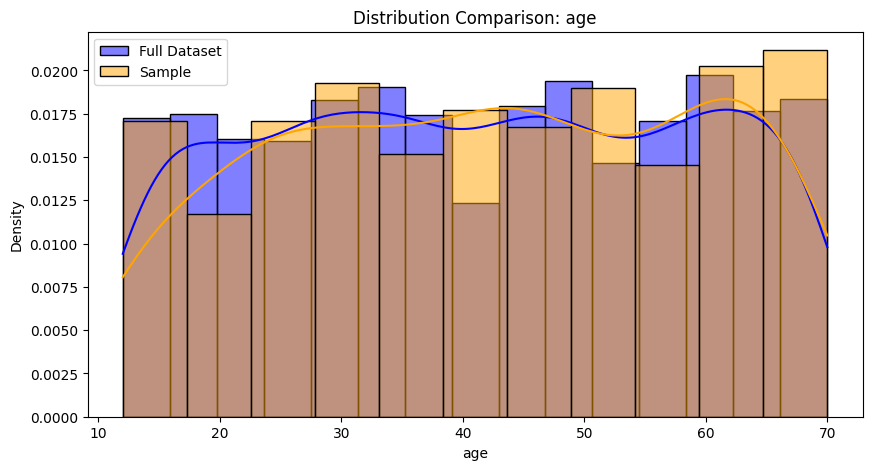

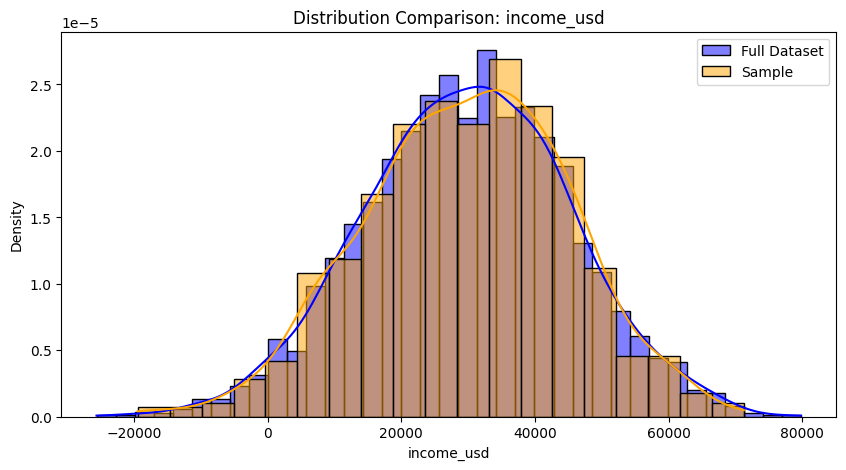

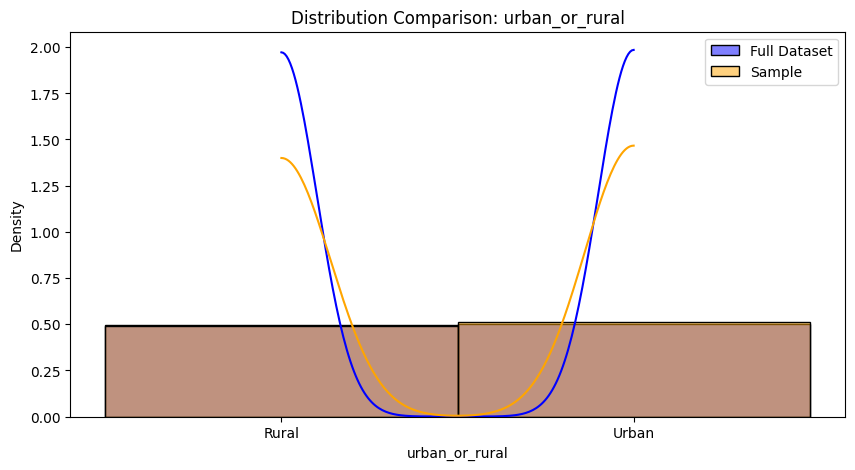

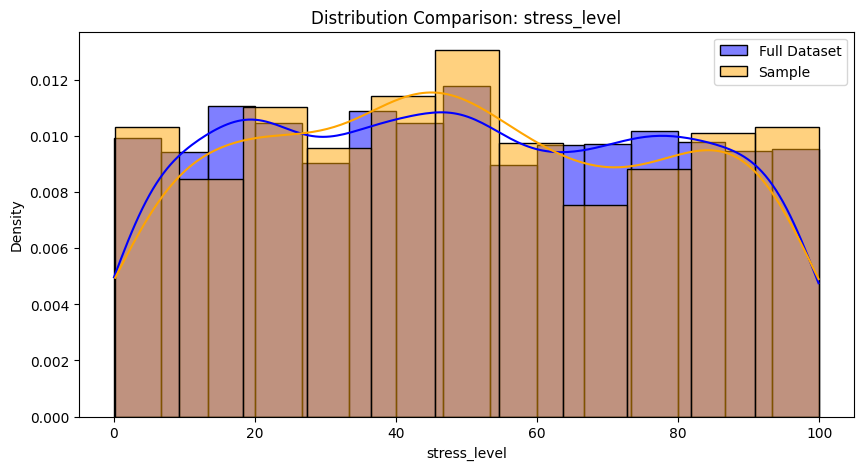

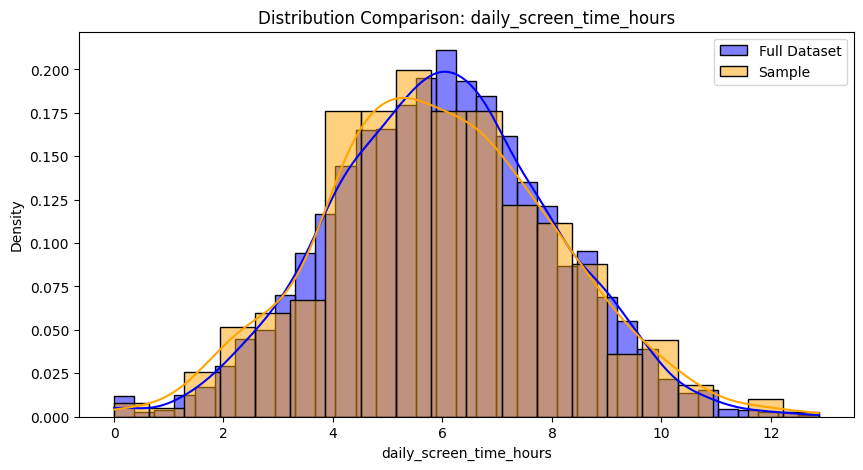

In [ ]:
# Mostra e të dhënave

sample_data = df.sample(frac=0.2, random_state=42)

numeric_cols = ['age', 'income_usd', 'urban_or_rural', 'stress_level', 'daily_screen_time_hours']

for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], color='blue', label='Full Dataset', kde=True, stat="density", alpha=0.5)
    sns.histplot(sample_data[col], color='orange', label='Sample', kde=True, stat="density", alpha=0.5)
    plt.title(f'Distribution Comparison: {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [ ]:
# Trajtimi i outliers me IQR

Q1 = df["income_usd"].quantile(0.25)
Q2 = df["income_usd"].quantile(0.50)
Q3 = df["income_usd"].quantile(0.75)
Q4 = df["income_usd"].max()

IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1}")
print(f"Q2 (Median): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"Q4 (Max): {Q4}")
print(f"IQR (Q3 - Q1): {IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

outliers = df[(df["income_usd"] < lower_bound) | (df["income_usd"] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

sum_above_upper = df.loc[df["income_usd"] > upper_bound, "income_usd"].sum()

count_above_upper = (df["income_usd"] > upper_bound).sum()
count_under_upper = (df["income_usd"] < lower_bound).sum()

print(f"Count of values above upper bound: {count_above_upper}")
print(f"Count of values above upper bound: {count_under_upper}")

# Remove outliers from the 'income_usd' column
df_no_outliers = df[(df["income_usd"] >= lower_bound) & (df["income_usd"] <= upper_bound)]

print(f"Original dataset size: {len(df)}")
print(f"Dataset size after removing outliers: {len(df_no_outliers)}")

df_no_outliers.describe()

Q1 (25th percentile): 19482.704999999998
Q2 (Median): 30002.71
Q3 (75th percentile): 40352.0175
Q4 (Max): 79829.55
IQR (Q3 - Q1): 20869.312500000004
Lower Bound:  -11821.26375000001
Upper Bound:  71655.98625000002
Number of outliers: 14
Count of values above upper bound: 4
Count of values above upper bound: 10
Original dataset size: 3000
Dataset size after removing outliers: 2986


,age,income_usd,daily_screen_time_hours,phone_unlocks_per_day,social_media_usage_hours,gaming_usage_hours,streaming_usage_hours,messaging_usage_hours,work_related_usage_hours,sleep_hours,...,monthly_data_usage_gb,has_night_mode_on,age_first_phone,push_notifications_per_day,tech_savviness_score,education_level_encoded,relationship_status_encoded,urban_or_rural_encoded,self_reported_addiction_level_encoded,gender_encoded
count,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,...,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2418.000000,2986.000000,2986.000000,2986.000000,2986.000000
mean,41.318486,29876.619066,5.984012,79.696919,1.997405,1.519357,1.989786,1.489585,2.003138,6.493768,...,24.892689,0.504689,13.947421,99.102813,49.497361,1.717122,2.509377,1.498326,2.504689,1.979906
std,17.057653,15075.840248,2.018028,25.134910,0.963884,0.935469,0.981379,0.508757,0.953636,0.994143,...,9.725931,0.500062,3.739362,30.272616,28.842046,1.912279,1.117882,0.500081,1.120307,0.824010
min,12.000000,-11666.840000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.810000,...,0.000000,0.000000,8.000000,0.000000,0.010000,-1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.000000,19594.062500,4.590000,63.000000,1.340000,0.812500,1.290000,1.140000,1.340000,5.840000,...,18.315000,0.000000,11.000000,79.000000,23.732500,-1.000000,1.250000,1.000000,1.000000,1.000000
50%,42.000000,30035.340000,5.980000,80.000000,2.010000,1.520000,2.005000,1.500000,1.980000,6.490000,...,25.045000,1.000000,14.000000,99.000000,49.205000,1.000000,3.000000,1.000000,3.000000,2.000000
75%,56.000000,40351.297500,7.307500,96.000000,2.640000,2.180000,2.650000,1.840000,2.660000,7.160000,...,31.467500,1.000000,17.000000,119.000000,74.152500,3.000000,3.000000,2.000000,4.000000,3.000000
max,70.000000,71271.660000,12.870000,182.000000,5.050000,4.860000,5.180000,3.070000,5.260000,10.320000,...,54.850000,1.000000,20.000000,204.000000,99.940000,4.000000,4.000000,2.000000,4.000000,3.000000


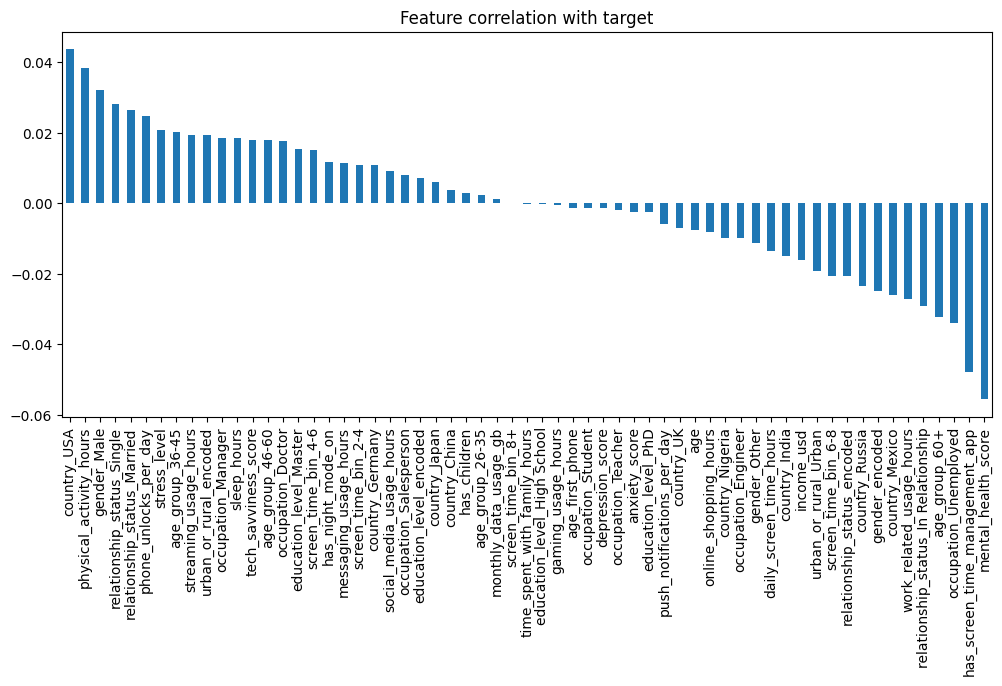

Top 5 features (RFE with RandomForest): ['income_usd', 'daily_screen_time_hours', 'mental_health_score', 'depression_score', 'anxiety_score']


In [ ]:
#zgjedhja e nën bashkësisë së vetive
target_column = "self_reported_addiction_level"
X = df.drop(columns=[target_column, "self_reported_addiction_level_encoded"], errors='ignore')

y = df[target_column]

le = LabelEncoder()
y_encoded = le.fit_transform(y)


X_encoded = pd.get_dummies(X, drop_first=True)


X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce')
X_encoded = X_encoded.fillna(0)

# 4️ Correlation with target
corr = X_encoded.corrwith(pd.Series(y_encoded))
plt.figure(figsize=(12,5))
corr.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature correlation with target")
plt.show()

# 5️ Feature selection using SelectKBest (f_classif)
selector = SelectKBest(score_func=f_classif, k=5)  # select top 5 features
X_new = selector.fit_transform(X_encoded, y_encoded)
top_features_f = X_encoded.columns[selector.get_support()]
#print("Top 5 features (SelectKBest f_classif):", top_features_f.tolist())

# 6️ Recursive Feature Elimination (RFE) with RandomForest
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_encoded, y_encoded)
top_features_rfe = X_encoded.columns[rfe.support_]
print("Top 5 features (RFE with RandomForest):", top_features_rfe.tolist())

In [ ]:
# Diskretizimi i 'daily_screen_time_hours' ne kategori
bins = [0, 2, 5, 8, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']
df['Screen_Time_Category'] = pd.cut(df['daily_screen_time_hours'], bins=bins, labels=labels)
print("\n Diskretizimi u aplikua mbi kolonën 'Daily_Screen_Time_Hours'")
print(df[['daily_screen_time_hours', 'Screen_Time_Category']].head())





✅ Diskretizimi u aplikua mbi kolonën 'Daily_Screen_Time_Hours'
   daily_screen_time_hours Screen_Time_Category
0                     5.81                 High
1                     9.05            Very High
2                     5.76                 High
3                     6.71                 High
4                     6.31                 High


In [ ]:
#Binarizimi
binarize_cols = [
    'gender', 'relationship_status', 'urban_or_rural', 'has_children'
]

binarized_dfs = []

for col in binarize_cols:
    if col in df.columns:
        
        if df[col].dtype == bool:
            df[col] = df[col].astype(int)

        dummies = pd.get_dummies(df[col], prefix=col, dtype=int)  
        df = pd.concat([df, dummies], axis=1)
        binarized_dfs.append(dummies)
        print(f" U krye binarizimi për kolonën: {col}")
    else:
        print(f"Kolona '{col}' nuk ekziston — u anashkalua.")

if binarized_dfs:
    binarized_result = pd.concat(binarized_dfs, axis=1)
    print("\n--- Kolonat e binarizuara (me 0 dhe 1) ---")
    print(binarized_result.head(5))
else:
    print("\n Asnjë kolonë nuk u binarizua — kontrollo emrat e kolonave.")

df.head()


 U krye binarizimi për kolonën: gender
 U krye binarizimi për kolonën: relationship_status
 U krye binarizimi për kolonën: urban_or_rural
 U krye binarizimi për kolonën: has_children

--- Kolonat e binarizuara (me 0 dhe 1) ---
   gender_Female  gender_Male  gender_Other  relationship_status_Divorced  \
0              0            1             0                             0   
1              0            1             0                             0   
2              0            0             1                             0   
3              1            0             0                             0   
4              0            0             1                             1   

   relationship_status_In Relationship  relationship_status_Married  \
0                                    0                            0   
1                                    1                            0   
2                                    0                            0   
3                         

,country,age,gender,occupation,education_level,income_usd,daily_screen_time_hours,phone_unlocks_per_day,social_media_usage_hours,gaming_usage_hours,...,gender_Male,gender_Other,relationship_status_Divorced,relationship_status_In Relationship,relationship_status_Married,relationship_status_Single,urban_or_rural_Rural,urban_or_rural_Urban,has_children_0,has_children_1
0,India,32,Male,Salesperson,High School,43865.49,5.81,75,0.84,0.00,...,1,0,0,0,0,1,1,0,1,0
1,UK,26,Male,Artist,Master,41868.19,9.05,61,3.13,2.50,...,1,0,0,1,0,0,1,0,1,0
2,Germany,70,Other,Doctor,High School,59636.51,5.76,58,2.12,1.96,...,0,1,0,0,0,1,0,1,0,1
3,UK,44,Female,Engineer,NaN,39022.07,6.71,80,1.60,2.70,...,0,0,0,1,0,0,0,1,1,0
4,Brazil,46,Other,Student,NaN,-783.98,6.31,136,1.51,1.73,...,0,1,1,0,0,0,0,1,1,0


In [ ]:
#Krijimi i vetive të reja
# Sa orë kalon përdoruesi në aktivitete argëtuese
df['Total_Entertainment_Hours'] = (
    df['social_media_usage_hours'] +
    df['gaming_usage_hours'] +
    df['streaming_usage_hours'] +
    df['messaging_usage_hours']
)

# Indeksi i shëndetit mendor
df['Overall_Mental_Health_Index'] = (
    df['mental_health_score'] -
    (df['stress_level'] + df['depression_score'] + df['anxiety_score']) / 3
)

print(" U krijuan vetitë e reja!")
print(df[['Total_Entertainment_Hours', 'Overall_Mental_Health_Index']].head())


 U krijuan vetitë e reja!
   Total_Entertainment_Hours  Overall_Mental_Health_Index
0                       5.64                    -5.303333
1                       8.85                    41.530000
2                       7.90                    -5.870000
3                       8.63                    25.950000
4                       6.02                    43.826667
